In [1]:
import math
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt

### **Executing 2-Approx**

In [2]:
df = pan.read_csv('output_2approx.csv',header=None)
print(df)

                  0     1         2             3         4     5
0   burma14            14      3814  4.806710e+05  0.000481  1820
1   ulysses16          16      7903  5.803905e+05  0.000580  1041
2   ulysses22          22      8401  9.080554e+05  0.000908   480
3   eil51              51       581  5.293788e+06  0.005294   199
4   berlin52           52     10114  4.389928e+06  0.004390   253
5   kroD100           100     27112  1.728954e+07  0.017289    53
6   kroA100           100     27210  1.371014e+07  0.013710    80
7   ch150             150      8347  3.982625e+07  0.039826    26
8   gr202             202     51990  9.607151e+07  0.096072    14
9   gr229             229    180152  9.161666e+07  0.091617    11
10  pcb442            442     73030  2.953909e+08  0.295391     3
11  d493              493     44892  4.353379e+08  0.435338     2
12  dsj1000          1000  25086767  1.647513e+09  1.647513     1


In [3]:
df_2approx=df
#df_2approx.drop(df_2approx.columns[0], inplace=True, axis=1) # Remove the custom Index

df_2approx.columns = ['dataset','num_nodes', 'weight','time', 'time_in_s', 'num_calls'] # Add Column Headings
print(df_2approx)

            dataset  num_nodes    weight          time  time_in_s  num_calls
0   burma14                 14      3814  4.806710e+05   0.000481       1820
1   ulysses16               16      7903  5.803905e+05   0.000580       1041
2   ulysses22               22      8401  9.080554e+05   0.000908        480
3   eil51                   51       581  5.293788e+06   0.005294        199
4   berlin52                52     10114  4.389928e+06   0.004390        253
5   kroD100                100     27112  1.728954e+07   0.017289         53
6   kroA100                100     27210  1.371014e+07   0.013710         80
7   ch150                  150      8347  3.982625e+07   0.039826         26
8   gr202                  202     51990  9.607151e+07   0.096072         14
9   gr229                  229    180152  9.161666e+07   0.091617         11
10  pcb442                 442     73030  2.953909e+08   0.295391          3
11  d493                   493     44892  4.353379e+08   0.435338          2

In [4]:
ratios = [None] + [round(df_2approx.iloc[i + 1]['time'] / df_2approx.iloc[i]['time'], 6) for i in range((df_2approx.shape[0] - 1))]
ratios

[None,
 1.207459,
 1.564559,
 5.829808,
 0.82926,
 3.938456,
 0.792973,
 2.904876,
 2.412266,
 0.95363,
 3.224205,
 1.473769,
 3.784446]

In [5]:
c_estimates = [round(df_2approx.iloc[i]['time'] / float(df_2approx.iloc[i]['num_nodes']) , 6) for i in range(df_2approx.shape[0])]
c_estimates

[34333.642072,
 36274.40562,
 41275.246212,
 103799.773377,
 84421.701125,
 172895.415094,
 137101.3875,
 265508.333333,
 475601.520509,
 400072.766971,
 668305.128205,
 883038.336714,
 1647512.9]

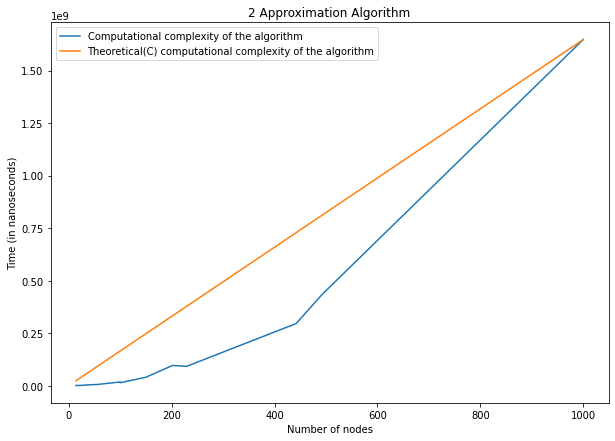

In [6]:
reference = []
for i in range(df_2approx.shape[0]):
  reference = [round(1647512.9 *  float(df_2approx.iloc[i]['num_nodes']), 6) for i in range(df_2approx.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_2approx['num_nodes'], df_2approx['time'], label='Computational complexity of the algorithm')
ax.plot(df_2approx['num_nodes'], reference, label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('2 Approximation Algorithm')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('2approx.png')
plt.show()

### **Executing Nearest Neighbor Algorithm**

In [7]:
df = pan.read_csv('output_nearest_neighbor.csv',header=None)

In [8]:
df_near_neighbors=df
#df_near_neighbors.drop(df_near_neighbors.columns[0], inplace=True, axis=1) # Remove the custom Index

df_near_neighbors.columns = ['dataset','num_nodes', 'weight','time', 'time_in_s', 'num_calls'] # Add Column Headings
#print(df_kruskal)

In [9]:
ratios = [None] + [round(df_near_neighbors.iloc[i + 1]['time'] / df_near_neighbors.iloc[i]['time'], 6) for i in range((df_near_neighbors.shape[0] - 1))]
ratios

[None,
 1.316193,
 1.675299,
 4.653786,
 1.077714,
 2.820838,
 1.327301,
 1.697371,
 1.907128,
 1.49602,
 5.223723,
 0.998857,
 3.792382]

In [10]:
c_estimates = [round(df_near_neighbors.iloc[i]['time'] / float(df_near_neighbors.iloc[i]['num_nodes']) , 6) for i in range(df_near_neighbors.shape[0])]
c_estimates

[20824.325552,
 23982.728165,
 29220.53701,
 58660.683053,
 62003.693715,
 90949.243243,
 120717.026786,
 136601.064103,
 193452.227723,
 255285.974827,
 690908.144796,
 618726.673428,
 1156798.7]

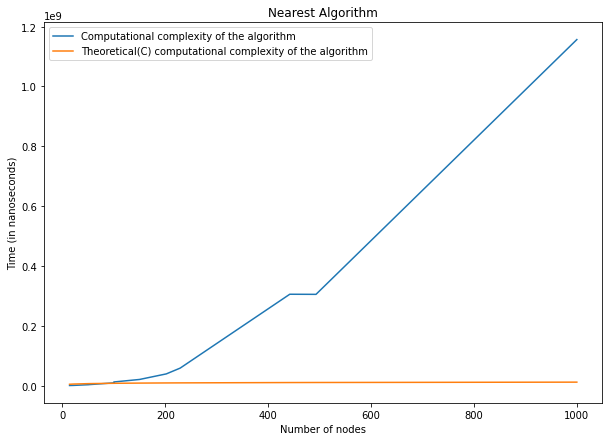

In [11]:
reference = []
for i in range(df_near_neighbors.shape[0]):
  reference = [round(1156798.7 *  math.log(float(df_near_neighbors.iloc[i]['num_nodes']), 2), 6) for i in range(df_near_neighbors.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_near_neighbors['num_nodes'], df_near_neighbors['time'], label='Computational complexity of the algorithm')
ax.plot(df_near_neighbors['num_nodes'], reference, label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('Nearest Algorithm')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('near_neighbour.png')
plt.show()

### **Executing Prim's Algorithm**

In [12]:
df = pan.read_csv('output_random_insertion.csv',header=None)

In [13]:
df_random_insertion=df
#df_random_insertion.drop(df_random_insertion.columns[0], inplace=True, axis=1) # Remove the custom Index

df_random_insertion.columns = ['dataset','num_nodes', 'weight','time', 'time_in_s', 'num_calls'] # Add Column Headings
#print(df_prim)

In [14]:
ratios = [None] + [round(df_random_insertion.iloc[i + 1]['time'] / df_random_insertion.iloc[i]['time'], 6) for i in range((df_random_insertion.shape[0] - 1))]
ratios

[None,
 1.085447,
 1.733974,
 3.917659,
 1.826469,
 2.040845,
 1.001168,
 2.357495,
 1.764752,
 1.727522,
 2.592393,
 1.336108,
 4.208389]

In [15]:
c_estimates = [round(df_random_insertion.iloc[i]['time'] /  math.log(float(df_random_insertion.iloc[i]['n_vertices'])), 6) for i in range(df_random_insertion.shape[0])]
c_estimates

KeyError: 'n_vertices'

In [ ]:
reference = []
for i in range(df_random_insertion.shape[0]):
  reference = [round(2874.862482 * math.log(float(df_random_insertion.iloc[i]['num_nodes']), 2), 6) for i in range(df_random_insertion.shape[0])]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_random_insertion['num_nodes'], df_random_insertion['time'], label='Computational complexity of the algorithm')
ax.plot(df_random_insertion['num_nodes'], reference, label='Theoretical(C) computational complexity of the algorithm')
ax.set_title('Random Insertion Algorithm')
plt.xlabel('Number of nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('random.png')
plt.show()

### **Comparing: Kruskal Union-Find vs Prim**

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(df_2approx['num_nodes'], df_2approx['time'], label='2-Approximation')
ax.plot(df_near_neighbors['num_nodes'], df_near_neighbors['time'], label='Nearest Neighbor')
ax.plot(df_random_insertion['num_nodes'], df_random_insertion['time'], label='Random Insertion')

ax.set_title('Algorithm Comparison for TSP solution')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (in nanoseconds)')
ax.legend()
plt.savefig('all_algo_cmparison.png')
plt.show()